In [88]:
import  requests,time
from  bs4  import BeautifulSoup
import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [89]:
url="https://en.wikipedia.org/wiki/Country"
#  now downloading source code
webdata=requests.get(url)
print(webdata)  #  th

<Response [200]>


In [90]:
time.sleep(2)
myhtmldata=webdata.text
# now we can apply  BS4
souped=BeautifulSoup(myhtmldata,'html5lib')
#print(souped.findAll('a'))
#print(souped.find(''))

dir={}
con=souped.get_text()
for i in con.split():
    #print(i)
    if i not in dir:
    
        dir[i]=1
    else:
        dir[i]=dir[i]+1
print(dir)
    #print(souped.get_text())
#print(myhtmldata)
data={"words": list(dir.keys()),"count":list(dir.values())}



{'Country': 10, '-': 1, 'Wikipedia': 3, 'document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xg@zJwpAIC4AAC8-qdkAAABI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Country","wgTitle":"Country","wgCurRevisionId":933935717,"wgRevisionId":933935717,"wgArticleId":5165,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages': 1, 'with': 18, 'citations': 2, 'lacking': 2, 'titles","Webarchive': 1, 'template': 2, 'wayback': 2, 'links","Use': 1, 'dmy': 2, 'dates': 2, 'from': 24, 'July': 3, '2019","Articles': 1, 'short':

In [91]:
data_frame=pd.DataFrame.from_dict(data)

In [92]:
data_frame

,words,count
0,Country,10
1,-,1
2,Wikipedia,3
3,"document.documentElement.className=""client-js""...",1
4,with,18
...,...,...
877,include,1
878,divisions,1
879,regions,1
880,"characteristics""}",1


In [93]:

Top_data=data_frame.nlargest(11,'count')
newdata=Top_data.values
#newdata[:,1]
#newdata[:,1]
newdata
#Top_data

array([['the', 54],
       ['of', 45],
       ['a', 34],
       ['and', 26],
       ['from', 24],
       ['in', 20],
       ['The', 19],
       ['with', 18],
       ['^', 18],
       ['as', 17],
       ['to', 16]], dtype=object)

[]

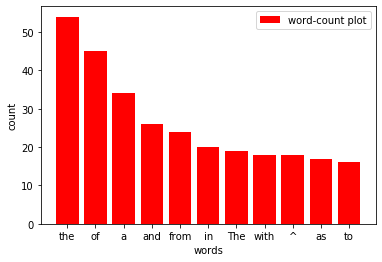

In [94]:

plt.xlabel("words")
plt.ylabel("count")
plt.bar(newdata[:,0],newdata[:,1],label="word-count plot",color="r")
plt.legend()
plt.plot()

In [95]:
import random
c=["yes","No"]
x=[]
for i in range(0,11):
    y=random.choice(c)
    x.append(y)
x

['yes', 'No', 'yes', 'yes', 'No', 'yes', 'No', 'No', 'yes', 'No', 'No']

In [96]:
#x=["yes","No","yes","yes",]
Top_data.insert(2,"Labels",x)


In [97]:
Top_data

,words,count,Labels
29,the,54,yes
80,of,45,No
46,a,34,yes
58,and,26,yes
13,from,24,No
49,in,20,yes
131,The,19,No
4,with,18,No
459,^,18,yes
45,as,17,No


In [101]:
from sklearn.tree import DecisionTreeClassifier
features=newdata
lables=Top_data["Labels"]
print(lables)
desclf=DecisionTreeClassifier()
traineddec=desclf.fit(features,lables)

29     yes
80      No
46     yes
58     yes
13      No
49     yes
131     No
4       No
459    yes
45      No
33      No
Name: Labels, dtype: object


ValueError: could not convert string to float: 'the'